# Random Variables and Probability Distribution Functions in Python

### Outline

-  Quick Recap
-  Discrete Random Variables and Probability Distribution Functions in Python
- Continuous Random Variables and Probability Distribution Functions in Python
- Wrap up


  
## Quick Recap: Random Variables and Probability Distribution Functions

A random variable is the set of possible values from a random experiment. Depending on the experiment, random variables can assume **discrete** or **continuous** values.

**Discrete Random Variable Example:** You can define a random variable X to be the number which comes up when you roll a fair dice. X can take values: [1,2,3,4,5,6] and therefore is a *discrete random variable*.

**Continuous Random Variable Example:** We can also define a random variable X to be the (not rounded) height of students in a class. Since the height can assume *any* value, X in this case will be a *continuous random variable*.

A **probability distribution function** (or PDF) is a list of all of the possible outcomes of a random variable along with their corresponding probability values.

Again, depending on the experiment, we can have  **discrete** or **continuous probability distribution functions**.

## Discrete Random Variables and Probability Distribution Functions in Python

In this section, we will demonstrate how to generate a Probability Distribution Function, or PDF, from a discrete random variable.


### Tossing a non-fair coin

Suppose we are tossing a non-fair coin. 

 - Heads corresponds to $0$ 
 - Tails corresponds to $1$

Then, we know that the corresponding random variable  $X$ for this experiment will be $X = \{0,1\}$. Additionally, we know that:
- Probability of Heads is $2/3$ 
- Probability of Tails is $1/3$


The function `rv_discrete` from the library `scipy.stats` helps us create the corresponding PDF for this experiment.

The function [`rv_discrete`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html) takes the following required argument:

- values: two array like values `(xk, pk)`
    - xk are integers  
    - pk are the non-zero probabilities between 0 and 1 with sum(pk) = 1
    - xk and pk must have the same shape

Observe the code in below:




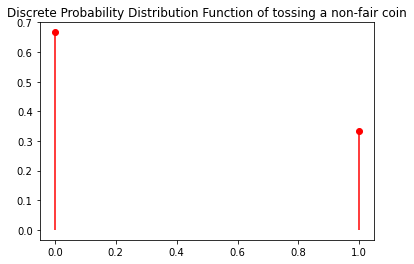

In [1]:
#importing the necessesary libraries
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

#defining our discrete random variable
rv = [0,1]
#defining our probabilities 
prob = (2/3, 1/3)
#generating our PDF
die_pdf = stats.rv_discrete(values=(rv, prob))

#plotting the PDF
plt.plot(rv, die_pdf.pmf(rv), 'ro')
plt.vlines(rv, 0, die_pdf.pmf(rv), colors='r')
plt.title("Discrete Probability Distribution Function of tossing a non-fair coin")
plt.show()

Of course, we have obtained a discrete PDF.

There is something special about this specific function: you can see that it only takes two values, 0 and 1, and that their probabilities sum to one.

Any PDF with these characteristics is called a **Bernouilli Distribution.**

The **Bernoulli distribution** is a discrete distribution having two possible outcomes labeled by 0 and 1 in which:
- 1 occurs with probability $p$ and 
- 0 occurs with probability $q=1-p$, where $0<p<1$. 

### Tossing a fair coin

Suppose now we are tossing a fair coin. 
- Heads corresponds to $0$ 
- Tails corresponds to $1$

Again, the corresponding random variable  $X$ for this experiment will be $X = \{0,1\}$ but this time **both heads and tails** have a probability of $1/2$ of turning up.

We modify the code as follows:


In [ ]:
#importing the necessesary libraries
from scipy import stats
import matplotlib.pyplot as plt

#defining our discrete random variable
rv = [0,1]
#re-defining our probabilities 
prob = (1/2, 1/2)
#generating our PDF
die_pdf = stats.rv_discrete(values=(rv, prob))

#plotting the PDF
plt.plot(rv, die_pdf.pmf(rv), 'ro')
plt.vlines(rv, 0, die_pdf.pmf(rv), colors='r')
plt.title("Discrete Probability Distribution Function of tossing a fair coin")
plt.show()

Again, we have obtained a **Bernouilli PDF** with values 0 and 1 and probabilities 0.5 and 0.5.

## Continuous Probability Distribution Functions in Python

Let's see how to create a continuous probablity distribution function with an example.

In the code cell below, we have imported a dataset (downloadable from [here](https://www.kaggle.com/mustafaali96/weight-height)) that includes the weights and heights of some individuals.

In the code cell below, we use the `pandas` function `read_csv` to read the dataset `weight-height.csv` into the dataframe `df`.




In [2]:
import pandas as pd
df = pd.read_csv('weight-height.csv')
#visualize first five rows
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


We are only interested in the weights of females, so we remove all the rows with `Gender=Male`

In [3]:
df = df[df['Gender']=='Female']
df.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


Next, we plot the weight data in a histogram using 20 bins.

(array([  3.,   3.,   9.,  36.,  82., 162., 284., 417., 565., 680., 724.,
        670., 515., 369., 259., 120.,  63.,  25.,  11.,   3.]),
 array([ 64.70012671,  71.57698106,  78.45383542,  85.33068977,
         92.20754412,  99.08439847, 105.96125282, 112.83810717,
        119.71496152, 126.59181587, 133.46867023, 140.34552458,
        147.22237893, 154.09923328, 160.97608763, 167.85294198,
        174.72979633, 181.60665069, 188.48350504, 195.36035939,
        202.23721374]),
 <a list of 20 Patch objects>)

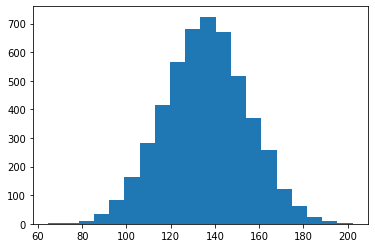

In [4]:
weights = df['Weight'].tolist()
plt.hist(weights, bins=20)

The shape of the distribution above is really similar to the shape of a very common continuous distribution, the **Normal distribution**.

In fact, we can fit a Normal distribution on top of the one we have just obtained.

First of all, we need to extract from our data the **mean** and the **standard deviation**, as we will need these parameters in order to generate our fitting distribution.

In [5]:
#defining the mean
mean_dist = df['Weight'].mean()
#defining the standard deviation
std_dist = df['Weight'].std()

Now, we can use these parameters to generate our Normal distribution using the `scipy.stats` function `norm`.

In [6]:
from scipy.stats import norm
#generating the normal PDF
distribution = norm(mean_dist, std_dist)

Next, we choose the range on which we’ll plot the PDF and the probabilities for that range.

In [7]:
#lower bound
min_weight = df['Weight'].min()
#upper bound
max_weight = df['Weight'].max()
#generate a sequence of equally spaces values
values = list(range(int(min_weight), int(max_weight)))
#generate probabilities for each value (these will follow the shape of a normal distribution!)
probabilities = [distribution.pdf(v) for v in values]


Finally, we plot the sample distribution and the PDF we have generated.

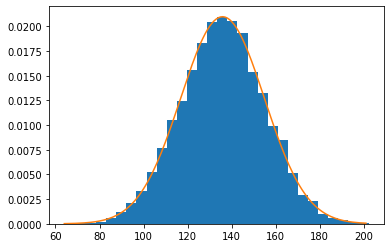

In [8]:
from matplotlib import pyplot
#plotting weight distribution
pyplot.hist(weights, bins=30, density = True) 
#plotting normal distribution (orange line)
pyplot.plot(values, probabilities)

Of course, there are many other types of discrete and continuous probability distribution functions.

## Wrap up

- A **random variable** is the set of possible values from a random experiment
- A **probability distribution function** is a list of all of the possible outcomes of a random variable along with their corresponding probability values
- Discrete probability distribution function in Python
- Continuous probability distribution function in Python